Playground
---

List of regressors and their hyperparameters

## Linear Regressors
in `sklearn.linear_model`

#### `LinearRegression`
 * Force positive coefficients (e.g. Ordinary least squares vs. Non-Negative least squares): `positive=True`

#### `Ridge`
 * Complexity parameter $\alpha$: `alpha=.5` (defaults to 1.0)
 * Force positive coefficients: `positive=True`
 * Solver method: `solver =` ` 'auto'`, `'svd'`, `'cholesky'`, `'lsqr'`, `'sparse_cg'`, `'sag'`, `'saga'` or `'lbfgs'`

#### `RidgeCV`
 * Same as above with built-in cross validation: defaults to "leave-one-out", `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `Lasso`
 * Sparsity parameter $\alpha$: `alpha=.1` (defaults to 1.0)
 * Force positive coefficients: `positive=True`


#### `LassoCV`
 * Same as above with built-in cross validation: default 5-fold cross-validation, `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `LassoLars`
 * Lasso with Least Angle Regression 

#### `LassoLarsCV`
 * Same as above with built-in cross validation: default 5-fold cross-validation, `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `LassoLarsIC`
* `Lasso` with information-criteria based model selection

#### `MultiTaskLasso`
* `Lasso` with y being a 2D array, of shape (n_samples, n_tasks)

#### `ElasticNet` & `ElasticNetCV`
* ...

#### `MultiTaskElasticNet` & `MultiTaskElasticNetCV`
* ...
* `ElasticNet` with y being a 2D array, of shape (n_samples, n_tasks)

#### `OrthogonalMatchingPursuit`
* ...

#### `BayesianRidge`
* ...

#### `ARDRegression` (Automatic Relevance Determination)
* ...

#### `TweedieRegressor` (GenLins)
* `power`, `alpha`, `link=` z.B. `'log'`
* `power = 1` equivalent to `PoissonRegressor`
* `power = 2` equivalent to `GammaRegressor`
* `power = 3` Inverse Gaussian distribution.

#### `SGDRegressor`
* ...

#### `Perceptron`
* ...

#### `PassiveAggressiveRegressor`
* ...

#### `HuberRegressor` & `TheilSenRegressor` & `RANSACRegressor`
* ...

#### `QuantileRegressor`
* ...

#### `PolynomialFeatures`
* ...

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, scale
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from get_data import get_data

import warnings # supress warnings
warnings.filterwarnings('ignore')

X,y = get_data()
data = pd.merge(X,y,left_index = True, right_index = True)
y_label = "audit"

data

,ffmq_aa1,ffmq_ds2,ffmq_aa2,ffmq_nr2,ffmq_aa3,ffmq_nj1,ffmq_ob1,ffmq_aa4,ffmq_nr3,ffmq_ob2,...,upps_ss_4,upps_ss_5,dmq_cope_1,dmq_cope_2,dmq_cope_3,dmq_cope_4,dmq_cope_5,geschlecht_kod_male,erwerbstaetig_sub,audit
1,2.0,5.0,3.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,...,3.0,2.0,1.0,4.0,2.0,1.0,1.0,1,15.0,8.0
2,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,3.0,...,4.0,1.0,1.0,5.0,1.0,2.0,2.0,1,40.0,10.0
3,4.0,4.0,2.0,5.0,4.0,3.0,2.0,2.0,4.0,3.0,...,1.0,3.0,1.0,4.0,1.0,2.0,1.0,1,20.0,4.0
4,2.0,5.0,2.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.0,1.0,1.0,1.0,1,0.0,18.0
5,3.0,5.0,4.0,4.0,4.0,5.0,1.0,4.0,4.0,1.0,...,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2.0,4.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,37.0,2.0
905,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,40.0,2.0
906,2.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,4.0,...,4.0,3.0,2.0,4.0,3.0,4.0,4.0,0,11.0,12.0
907,2.0,4.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0,0.0,7.0


In [80]:
ffmq = ['ffmq_aa1', 'ffmq_aa2',
       'ffmq_aa3', 'ffmq_aa4', 'ffmq_ds2', 'ffmq_ds3', 'ffmq_ds4',
       'ffmq_nj1', 'ffmq_nj2', 'ffmq_nj3', 'ffmq_nj4', 'ffmq_nr2',
       'ffmq_nr3', 'ffmq_nr4', 'ffmq_nr5', 'ffmq_nr6', 'ffmq_nr7',
       'ffmq_ob1', 'ffmq_ob2', 'ffmq_ob3', 'ffmq_ob4','audit']

data = data[ffmq]

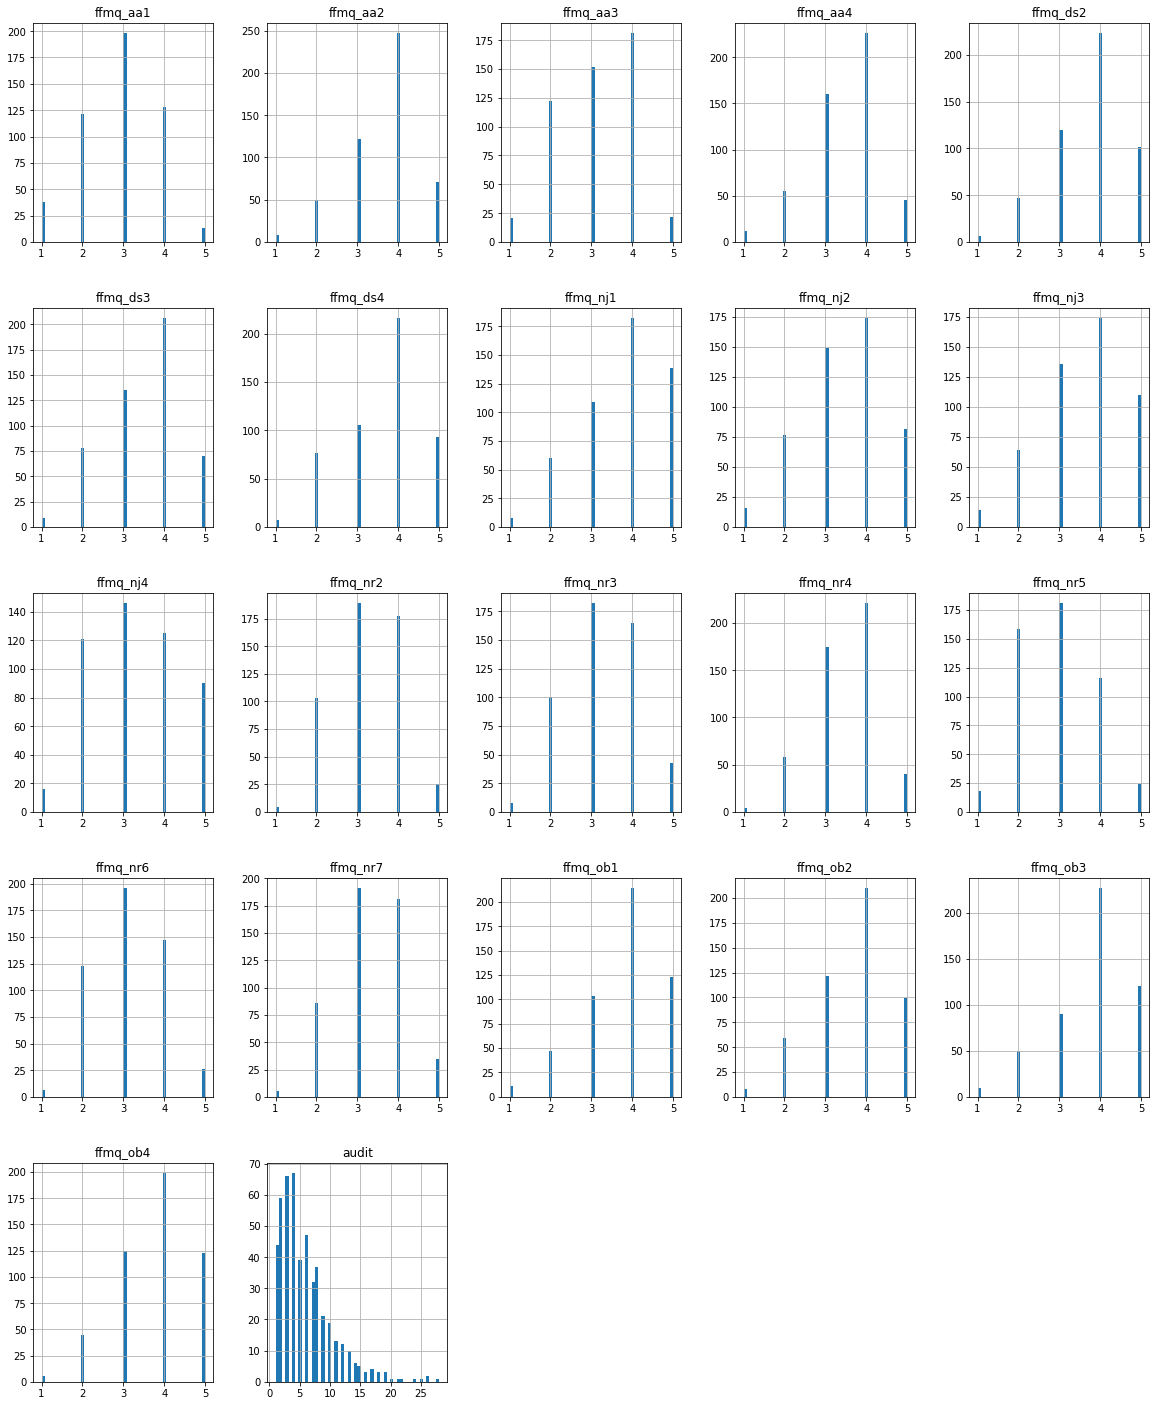

In [81]:
data.hist(bins=50, figsize=(20,25))
plt.show()

<AxesSubplot:>

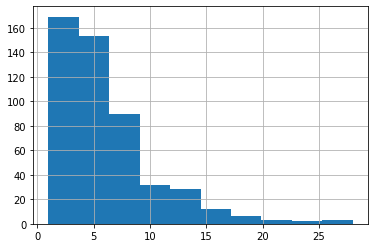

In [82]:
data.audit.hist()

In [83]:
# features with highest correlations
np.abs(data.corr()["audit"]).sort_values(ascending=False)[1:]

ffmq_nj3    0.203715
ffmq_aa2    0.189522
ffmq_nj1    0.187822
ffmq_aa3    0.179862
ffmq_ob3    0.171105
ffmq_aa1    0.155062
ffmq_ob4    0.144535
ffmq_nr3    0.135451
ffmq_aa4    0.131091
ffmq_ob1    0.121670
ffmq_ds4    0.113810
ffmq_ob2    0.110694
ffmq_nr7    0.104407
ffmq_ds3    0.101121
ffmq_nj2    0.095654
ffmq_nr5    0.079577
ffmq_nr6    0.078630
ffmq_nr2    0.072573
ffmq_ds2    0.052081
ffmq_nj4    0.031342
ffmq_nr4    0.031334
Name: audit, dtype: float64

In [84]:
# train-test split
df_train, df_test = train_test_split(data, test_size = 0.2, random_state = 0)

# rescale the features
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [85]:
df_train[ffmq] = scaler.fit_transform(df_train[ffmq])
df_test[ffmq] = scaler.fit_transform(df_test[ffmq])

In [86]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop(y_label)
X_train = df_train

y_test = df_test.pop(y_label)
X_test = df_test

# num of max features
len(X_train.columns)

21

**K-Fold CV**

**Hyperparameter Tuning Using Grid Search Cross-Validation**

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation. 

**LinearRegression**

In [98]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# step-2: specify range of hyperparameters to tune
hyper_params = [0]


# step-3: perform grid search
# 3.1 specify model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.score(X_train,y_train)

0.1282149272986337

In [100]:
y_pred = lin_reg.predict(X_test)

In [101]:
lin_reg.score(X_test,y_test)

0.02844999467633247

In [97]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lin_reg, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

AttributeError: 'int' object has no attribute 'items'

**Plot LinearRegression**

"Hyperparameters" are here for exemplary reasons the number of features

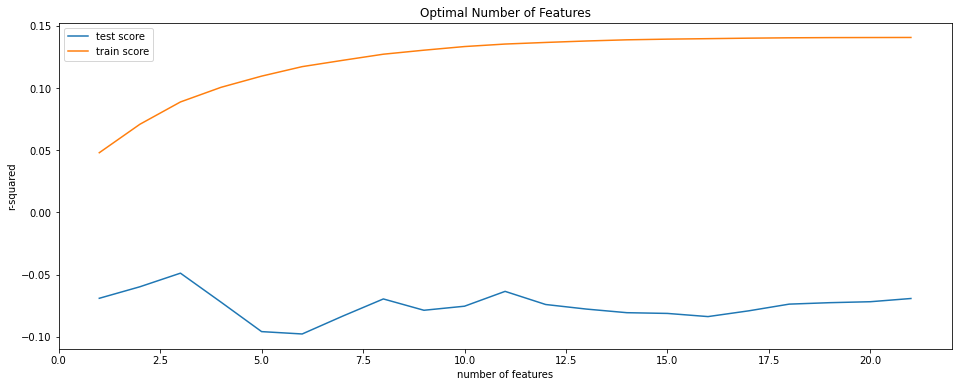

In [90]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')



Now we can choose the optimal value of number of features and build a final model.


In [94]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.0320689467727755


**Ridge Regression**

In [95]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 49))}]


# step-3: perform grid search
# 3.1 specify model
lin_reg = Lasso(alpha=0.1)
lin_reg.fit(X_train, y_train)
rfe = RFE(lin_reg)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033586,0.017935,0.002936,0.002015,1,{'n_features_to_select': 1},0.006052,-0.058640,-0.035068,-0.002062,...,-0.053967,0.067216,48,0.040518,0.038135,0.026075,0.038905,0.045904,0.037907,0.006509
1,0.020525,0.001615,0.002037,0.000367,2,{'n_features_to_select': 2},0.016832,-0.030473,-0.032473,0.000527,...,-0.042413,0.064787,47,0.057660,0.054795,0.031857,0.044778,0.069875,0.051793,0.012784
2,0.017886,0.000051,0.001764,0.000008,3,{'n_features_to_select': 3},0.020288,-0.030231,-0.029514,0.010293,...,-0.038660,0.065986,46,0.068247,0.069987,0.041821,0.046015,0.078935,0.061001,0.014473
3,0.017037,0.000037,0.001757,0.000006,4,{'n_features_to_select': 4},0.031295,-0.031491,-0.027816,0.019005,...,-0.032980,0.066287,45,0.071786,0.072233,0.043839,0.049697,0.081665,0.063844,0.014501
4,0.016255,0.000074,0.001771,0.000026,5,{'n_features_to_select': 5},0.032836,-0.029750,-0.027668,0.021084,...,-0.030991,0.065283,1,0.076584,0.072672,0.044216,0.050294,0.083385,0.065430,0.015352
5,0.015701,0.000439,0.001789,0.000044,6,{'n_features_to_select': 6},0.031810,-0.028919,-0.027668,0.021857,...,-0.032630,0.068470,44,0.077610,0.073017,0.044216,0.050674,0.085054,0.066114,0.015852
6,0.015004,0.000338,0.001864,0.000077,7,{'n_features_to_select': 7},0.031810,-0.028919,-0.027668,0.021857,...,-0.032594,0.068403,39,0.077610,0.073017,0.044216,0.050674,0.085400,0.066184,0.015935
7,0.013829,0.000137,0.001777,0.000047,8,{'n_features_to_select': 8},0.031810,-0.028919,-0.027668,0.021857,...,-0.032594,0.068403,39,0.077610,0.073017,0.044216,0.050674,0.085400,0.066184,0.015935
8,0.012931,0.000054,0.001760,0.000009,9,{'n_features_to_select': 9},0.031810,-0.028919,-0.027668,0.021857,...,-0.032594,0.068403,39,0.077610,0.073017,0.044216,0.050674,0.085400,0.066184,0.015935
9,0.012263,0.000266,0.001780,0.000035,10,{'n_features_to_select': 10},0.031810,-0.028919,-0.027668,0.021857,...,-0.032594,0.068403,39,0.077610,0.073017,0.044216,0.050674,0.085400,0.066184,0.015935


**Plot RidgeRegression**

"Hyperparamaters" are here for exemplary reasons the number of features

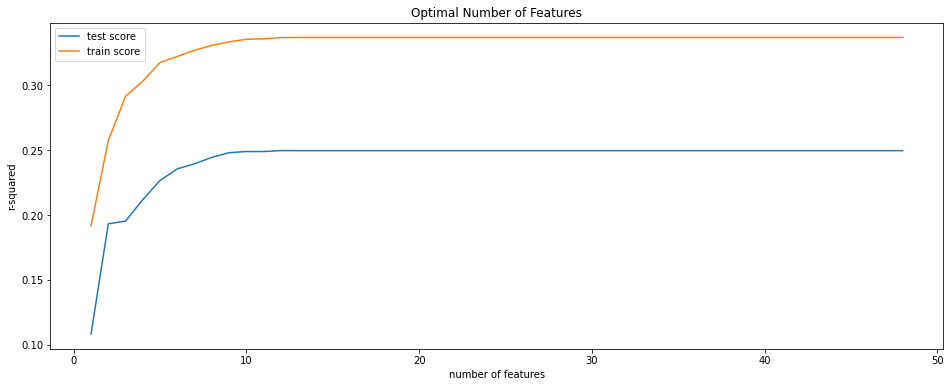

In [36]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')



Now we can choose the optimal value of number of features and build a final model.


## final model
n_features_optimal = 5

lm = Ridge(alpha=1.5)
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)